## MODEL KANDİLLİ DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load the data from the text file
file_path = '/content/1915-2023.txt'  # Replace with your file path

# Try different encodings if 'utf-8' does not work
try:
    kandilli_data = pd.read_csv(file_path, encoding='utf-8',sep="\t")
except UnicodeDecodeError:
    kandilli_data = pd.read_csv(file_path, encoding='latin1',sep="\t")  # or 'iso-8859-1' or 'cp1252'

kandilli_data.head()


,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20230831083800,2023.08.31,08:38:00.25,36.0547,27.1385,7.7,3.7,0.0,3.6,3.7,0.0,0.0,Ke,AKDENIZ
1,2,20230829060305,2023.08.29,06:03:05.24,38.0215,38.3377,6.3,3.9,0.0,3.8,3.9,0.0,0.0,Ke,YESILYAYLA-CELIKHAN (ADIYAMAN) [South 3.2 km]
2,3,20230829045814,2023.08.29,04:58:14.13,38.9088,32.9598,3.5,5.1,0.0,5.1,4.9,0.0,0.0,Ke,TAVSANCALI-KULU (KONYA) [South West 5.1 km]
3,4,20230827030942,2023.08.27,03:09:42.97,36.3487,27.8080,65.3,4.4,0.0,4.4,0.0,0.0,0.0,Ke,AKDENIZ
4,5,20230826091713,2023.08.26,09:17:13.88,35.8478,35.9930,8.1,3.6,0.0,3.5,3.6,0.0,0.0,Ke,YAYLADAGI (HATAY) [South West 8.8 km]


In [ ]:
kandilli_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20174 entries, 0 to 20173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           20174 non-null  int64  
 1   Deprem Kodu  20174 non-null  int64  
 2   Olus tarihi  20174 non-null  object 
 3   Olus zamani  20174 non-null  object 
 4   Enlem        20174 non-null  float64
 5   Boylam       20174 non-null  float64
 6   Der(km)      20174 non-null  float64
 7   xM           20174 non-null  float64
 8   MD           20174 non-null  float64
 9   ML           20174 non-null  float64
 10  Mw           7193 non-null   float64
 11  Ms           20174 non-null  float64
 12  Mb           20174 non-null  float64
 13  Tip          20174 non-null  object 
 14  Yer          20174 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 2.3+ MB


In [ ]:
# Gereksiz sütunları çıkar
kandilli_data.drop(['Deprem Kodu','Tip'], axis=1, inplace=True)
# Gereksiz sütunları çıkar


In [ ]:
kandilli_data['Mw'].fillna(kandilli_data['Mw'].mean(), inplace=True)
kandilli_data['Mw'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20174 entries, 0 to 20173
Series name: Mw
Non-Null Count  Dtype  
--------------  -----  
20174 non-null  float64
dtypes: float64(1)
memory usage: 157.7 KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score
import numpy as np
import folium

In [ ]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time


In [ ]:
kandilli_data['TarihZaman'] = pd.to_datetime(kandilli_data['Olus tarihi'] + ' ' + kandilli_data['Olus zamani'])
kandilli_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20174 entries, 0 to 20173
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           20174 non-null  int64         
 1   Olus tarihi  20174 non-null  object        
 2   Olus zamani  20174 non-null  object        
 3   Enlem        20174 non-null  float64       
 4   Boylam       20174 non-null  float64       
 5   Der(km)      20174 non-null  float64       
 6   xM           20174 non-null  float64       
 7   MD           20174 non-null  float64       
 8   ML           20174 non-null  float64       
 9   Mw           20174 non-null  float64       
 10  Ms           20174 non-null  float64       
 11  Mb           20174 non-null  float64       
 12  Yer          20174 non-null  object        
 13  TarihZaman   20174 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 2.2+ MB


In [ ]:
kandilli_data['TarihZaman'].min()

Timestamp('1915-02-14 08:20:00.600000')

In [ ]:
# Data Encoding
label_encoder = preprocessing.LabelEncoder()
for col in kandilli_data.columns:
    if kandilli_data[col].dtype == 'object':
      label_encoder.fit(kandilli_data[col])
      kandilli_data[col] = label_encoder.transform(kandilli_data[col])
kandilli_data.dtypes

No                      int64
Olus tarihi             int64
Olus zamani             int64
Enlem                 float64
Boylam                float64
Der(km)               float64
xM                    float64
MD                    float64
ML                    float64
Mw                    float64
Ms                    float64
Mb                    float64
Yer                     int64
TarihZaman     datetime64[ns]
dtype: object

In [ ]:
most_correlated = kandilli_data.corr()['xM'].sort_values(ascending=False)
most_correlated

<ipython-input-410-227c9db4a709>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  most_correlated = kandilli_data.corr()['xM'].sort_values(ascending=False)


xM             1.000000
Ms             0.648355
Mb             0.554162
ML             0.421353
Mw             0.420900
Der(km)        0.290279
No             0.289924
MD             0.176381
Boylam         0.060743
Enlem          0.014794
Olus zamani   -0.008463
Yer           -0.019523
Olus tarihi   -0.321040
Name: xM, dtype: float64

In [ ]:
tarihzaman=kandilli_data['TarihZaman']
kandilli_data_2022 = kandilli_data[tarihzaman.dt.year == 2022]
kandilli_data.drop(['TarihZaman'], axis=1, inplace=True)
kandilli_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20174 entries, 0 to 20173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           20174 non-null  int64  
 1   Olus tarihi  20174 non-null  int64  
 2   Olus zamani  20174 non-null  int64  
 3   Enlem        20174 non-null  float64
 4   Boylam       20174 non-null  float64
 5   Der(km)      20174 non-null  float64
 6   xM           20174 non-null  float64
 7   MD           20174 non-null  float64
 8   ML           20174 non-null  float64
 9   Mw           20174 non-null  float64
 10  Ms           20174 non-null  float64
 11  Mb           20174 non-null  float64
 12  Yer          20174 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 2.0 MB


In [ ]:
kandilli_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1745 to 2054
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           310 non-null    int64         
 1   Olus tarihi  310 non-null    int64         
 2   Olus zamani  310 non-null    int64         
 3   Enlem        310 non-null    float64       
 4   Boylam       310 non-null    float64       
 5   Der(km)      310 non-null    float64       
 6   xM           310 non-null    float64       
 7   MD           310 non-null    float64       
 8   ML           310 non-null    float64       
 9   Mw           310 non-null    float64       
 10  Ms           310 non-null    float64       
 11  Mb           310 non-null    float64       
 12  Yer          310 non-null    int64         
 13  TarihZaman   310 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(4)
memory usage: 36.3 KB


In [ ]:
kandilli_data_2022.drop(['TarihZaman'], axis=1, inplace=True)
kandilli_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1745 to 2054
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           310 non-null    int64  
 1   Olus tarihi  310 non-null    int64  
 2   Olus zamani  310 non-null    int64  
 3   Enlem        310 non-null    float64
 4   Boylam       310 non-null    float64
 5   Der(km)      310 non-null    float64
 6   xM           310 non-null    float64
 7   MD           310 non-null    float64
 8   ML           310 non-null    float64
 9   Mw           310 non-null    float64
 10  Ms           310 non-null    float64
 11  Mb           310 non-null    float64
 12  Yer          310 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 33.9 KB


<ipython-input-413-15f5abb363e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kandilli_data_2022.drop(['TarihZaman'], axis=1, inplace=True)


In [ ]:
# Using MinMaxScaler
scaler = preprocessing.StandardScaler()
d = scaler.fit_transform(kandilli_data)
kandilli_data = pd.DataFrame(d, columns=kandilli_data.columns)
kandilli_data.head()

,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Yer
0,-1.731965,1.449934,-0.480759,-1.248849,-0.918415,-0.339249,-0.531615,-0.852671,0.633717,-0.118986,-0.325138,-0.59152,-1.314179
1,-1.731793,1.449608,-0.812845,-0.015592,1.002207,-0.407247,-0.154220,-0.852671,0.732290,0.121527,-0.325138,-0.59152,1.709958
2,-1.731622,1.449608,-0.966713,0.540778,0.079917,-0.543243,2.110149,-0.852671,1.373011,1.324090,-0.325138,-0.59152,1.345956
3,-1.731450,1.449281,-1.242328,-1.064500,-0.803598,2.458382,0.789267,-0.852671,1.028007,-4.568468,-0.325138,-0.59152,-1.314179
4,-1.731278,1.448955,-0.398731,-1.378583,0.600099,-0.319821,-0.720313,-0.852671,0.584431,-0.239242,-0.325138,-0.59152,1.577946


In [ ]:
# Using MinMaxScaler
scaler = preprocessing.StandardScaler()
d = scaler.fit_transform(kandilli_data_2022)
kandilli_data_2022 = pd.DataFrame(d, columns=kandilli_data_2022.columns)
kandilli_data_2022.head()

,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Yer
0,-1.726473,1.679055,-0.637116,0.129368,-1.085030,-0.379919,-0.926090,0.0,-0.766045,-0.341411,0.0,0.0,1.929607
1,-1.715298,1.661634,0.291087,-1.274536,-0.746481,-0.012145,0.331229,0.0,0.446588,0.033899,0.0,0.0,-1.333372
2,-1.704123,1.644214,-0.584316,1.668579,-0.017536,-0.566922,0.121676,0.0,0.042377,0.284106,0.0,0.0,-0.704655
3,-1.692949,1.626793,0.934833,-0.761672,-0.920911,3.241715,-0.926090,0.0,-0.766045,-0.341411,0.0,0.0,1.555145
4,-1.681774,1.626793,0.890774,-0.428017,0.423825,-0.298884,-0.716537,0.0,-0.766045,-0.216308,0.0,0.0,0.841767


In [ ]:
y=np.array(kandilli_data['xM'])
X=np.array(kandilli_data.drop('xM',axis=1))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


Büyüklük

In [ ]:
from sklearn.linear_model import LinearRegression
start1 = time.time()
linear=LinearRegression()
linear.fit(X_train,y_train)
ans1 = linear.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [ ]:
accuracy1=linear.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy1)

Accuracy of Linear Regression model is: 0.5658974314640437


In [ ]:
from sklearn import metrics
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.4805373755369488
Mean Squared Error: 0.4345860869311481
Root Mean Squared Error: 0.6592314365464894


Text(0, 0.5, 'Predicted Magnitude')

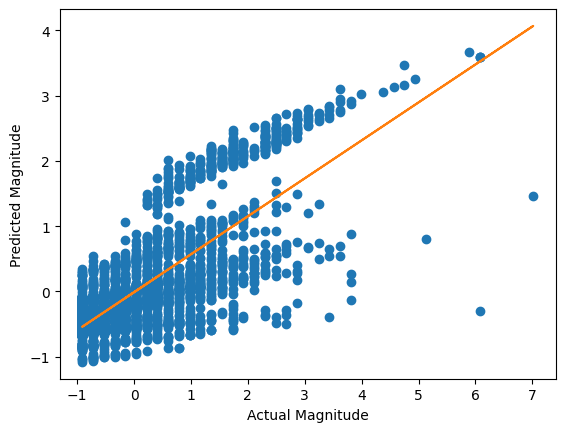

In [ ]:
plt.plot(y_test, ans1, 'o')
m, b = np.polyfit(y_test,ans1, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

Yer

In [ ]:
kandilli_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20174 entries, 0 to 20173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           20174 non-null  float64
 1   Olus tarihi  20174 non-null  float64
 2   Olus zamani  20174 non-null  float64
 3   Enlem        20174 non-null  float64
 4   Boylam       20174 non-null  float64
 5   Der(km)      20174 non-null  float64
 6   xM           20174 non-null  float64
 7   MD           20174 non-null  float64
 8   ML           20174 non-null  float64
 9   Mw           20174 non-null  float64
 10  Ms           20174 non-null  float64
 11  Mb           20174 non-null  float64
 12  Yer          20174 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Enlem ve boylam için veri setlerini hazırlama
y_lat = np.array(kandilli_data['Enlem'])
y_lon = np.array(kandilli_data['Boylam'])
X_loc = np.array(kandilli_data.drop(['Enlem', 'Boylam'], axis=1))

# Enlem için model
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_loc, y_lat, test_size=0.2, random_state=2)
model_lat = LinearRegression()
model_lat.fit(X_train_lat, y_train_lat)
predictions_lat = model_lat.predict(X_test_lat)

# Boylam için model
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X_loc, y_lon, test_size=0.2, random_state=2)
model_lon = LinearRegression()
model_lon.fit(X_train_lon, y_train_lon)
predictions_lon = model_lon.predict(X_test_lon)

# Performans metrikleri
print("Enlem için MAE:", mean_absolute_error(y_test_lat, predictions_lat))
print("Enlem için RMSE:", np.sqrt(mean_squared_error(y_test_lat, predictions_lat)))
print("Boylam için MAE:", mean_absolute_error(y_test_lon, predictions_lon))
print("Boylam için RMSE:", np.sqrt(mean_squared_error(y_test_lon, predictions_lon)))


Enlem için MAE: 0.7405336173167866
Enlem için RMSE: 0.8953622337387056
Boylam için MAE: 0.7362627050679579
Boylam için RMSE: 0.9057237198826822


In [ ]:
kandilli_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           310 non-null    float64
 1   Olus tarihi  310 non-null    float64
 2   Olus zamani  310 non-null    float64
 3   Enlem        310 non-null    float64
 4   Boylam       310 non-null    float64
 5   Der(km)      310 non-null    float64
 6   xM           310 non-null    float64
 7   MD           310 non-null    float64
 8   ML           310 non-null    float64
 9   Mw           310 non-null    float64
 10  Ms           310 non-null    float64
 11  Mb           310 non-null    float64
 12  Yer          310 non-null    float64
dtypes: float64(13)
memory usage: 31.6 KB


In [ ]:
# Gerçek enlem ve boylam değerleri
y_2022_lat = kandilli_data_2022['Enlem']
y_2022_lon = kandilli_data_2022['Boylam']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import folium

# Enlem ve boylam için ölçeklendiriciyi ayarlama
scaler_lat_lon = MinMaxScaler()
scaler_lat_lon.fit(kandilli_data_2022[['Enlem', 'Boylam']])

# 2022 verileri için tahminler
kandilli_data_2022.drop(['Enlem', 'Boylam'], axis=1, inplace=True)
X_2022_lat_lon= kandilli_data_2022


predictions_2022_lat = model_lat.predict(X_2022_lat_lon)
predictions_2022_lon = model_lon.predict(X_2022_lat_lon)

# Tahminleri gerçek dünya koordinatlarına dönüştürmek için ölçeklendirmeyi geri alma
predictions_2022_lat_lon_scaled = np.column_stack((predictions_2022_lat, predictions_2022_lon))
predictions_2022_lat_lon = scaler_lat_lon.inverse_transform(predictions_2022_lat_lon_scaled)

# Harita oluşturma
map = folium.Map(location=[38.0, 35.0], zoom_start=6)

# Gerçek ve tahmin edilen konumları haritaya ekleme
for (real_lat, real_lon), (pred_lat, pred_lon) in zip(zip(y_2022_lat, y_2022_lon), predictions_2022_lat_lon):
    # Gerçek konum
    folium.Marker(
        [real_lat, real_lon],
        icon=folium.Icon(color='blue'),
        popup='Gerçek Konum'
    ).add_to(map)

    # Tahmin edilen konum
    folium.Marker(
        [pred_lat, pred_lon],
        icon=folium.Icon(color='red'),
        popup='Tahmin Edilen Konum'
    ).add_to(map)

# Haritayı HTML dosyası olarak kaydetme veya gösterme
map.save("deprem_tahmin_haritasi_2022.html")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
import folium



predictions_2022_lat = model_lat.predict(X_2022_lat_lon)
predictions_2022_lon = model_lon.predict(X_2022_lat_lon)



# Harita oluşturma
map = folium.Map(location=[38.0, 35.0], zoom_start=6)

# Gerçek ve tahmin edilen konumları haritaya ekleme
for real_lat, real_lon, pred_lat, pred_lon in zip(y_2022_lat, y_2022_lon, predictions_2022_lat, predictions_2022_lon):
    # Gerçek konum
    folium.Marker(
        [real_lat, real_lon],
        icon=folium.Icon(color='blue'),
        popup='Gerçek Konum'
    ).add_to(map)

    # Tahmin edilen konum
    folium.Marker(
        [pred_lat, pred_lon],
        icon=folium.Icon(color='red'),
        popup='Tahmin Edilen Konum'
    ).add_to(map)

# Haritayı HTML dosyası olarak kaydetme veya gösterme
map.save("deprem_tahmin_haritasi_2022.html")
map

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Ölçeklendirme işlemi için kullanılan MinMaxScaler nesnesini yeniden oluşturun
  # Sadece enlem ve boylam sütunları için ölçeklendirme

# Tahminleri geri dönüştürme
predictions_2022_lat_lon = np.column_stack((predictions_2022_lat, predictions_2022_lon))
predictions_2022_lat_lon_rescaled = scaler_lat_lon.inverse_transform(predictions_2022_lat_lon)

# Haritayı oluşturma ve gerçek ile ölçeklendirilmiş tahminleri ekleme
map = folium.Map(location=[38.0, 35.0], zoom_start=6)
for real_lat, real_lon, (pred_lat, pred_lon) in zip(y_2022_lat, y_2022_lon, predictions_2022_lat_lon_rescaled):
    # Gerçek konum
    folium.Marker(
        [real_lat, real_lon],
        icon=folium.Icon(color='blue'),
        popup='Gerçek Konum'
    ).add_to(map)
    # Tahmin edilen konum
    folium.Marker(
        [pred_lat, pred_lon],
        icon=folium.Icon(color='red'),
        popup='Tahmin Edilen Konum'
    ).add_to(map)

map.save("deprem_tahmin_haritasi_2022.html")
map

NameError: ignored

In [ ]:
# Depremin zamanı için model (Unix zaman damgası olarak)
y_time = np.array(kandilli_data['Timestamp'])
X_time = np.array(kandilli_data.drop('Timestamp', axis=1))

X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time, y_time, test_size=0.2, random_state=2)
model_time = LinearRegression()
model_time.fit(X_train_time, y_train_time)
predictions_time = model_time.predict(X_test_time)

# Performans metrikleri
print("Zaman için MAE:", mean_absolute_error(y_test_time, predictions_time))
print("Zaman için RMSE:", np.sqrt(mean_squared_error(y_test_time, predictions_time)))


KeyError: ignored

In [ ]:
kandilli_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20174 entries, 0 to 20173
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         20174 non-null  float64
 1   Enlem      20174 non-null  float64
 2   Boylam     20174 non-null  float64
 3   Der(km)    20174 non-null  float64
 4   xM         20174 non-null  float64
 5   MD         20174 non-null  float64
 6   ML         20174 non-null  float64
 7   Mw         20174 non-null  float64
 8   Ms         20174 non-null  float64
 9   Mb         20174 non-null  float64
 10  Yer        20174 non-null  float64
 11  Timestamp  20174 non-null  float64
dtypes: float64(12)
memory usage: 1.8 MB


In [ ]:
kandilli_data['Timestamp'] = pd.to_datetime(kandilli_data['Timestamp'], unit='s')
print("Timestamp sütunu datetime'a dönüştürüldü.")

# 2022 yılı verilerini filtreleme ve kontrol
kandilli_data_2022 = kandilli_data[kandilli_data['Timestamp']dt.year == 1970]
kandilli_data_2022.info()

SyntaxError: ignored

In [ ]:
import folium

# Harita oluşturma
map = folium.Map(location=[38.0, 35.0], zoom_start=6)

# Test verilerinin gerçek ve tahmin edilen konumlarını haritaya ekleme
for lat, lon, pred_lat, pred_lon in zip(y_test_lat, y_test_lon, predictions_lat, predictions_lon):
    # Gerçek konum
    folium.Marker([lat, lon], icon=folium.Icon(color='blue')).add_to(map)
    # Tahmin edilen konum
    folium.Marker([pred_lat, pred_lon], icon=folium.Icon(color='red')).add_to(map)

# Haritayı HTML dosyası olarak kaydetme
map.save("deprem_tahmin_haritasi.html")



In [ ]:
# 'Timestamp' sütununu datetime türüne dönüştürme ve kontrol
kandilli_data['Timestamp'] = pd.to_datetime(kandilli_data['Timestamp'], unit='s')
print("Timestamp sütunu datetime'a dönüştürüldü.")

# 2022 yılı verilerini filtreleme ve kontrol
kandilli_data_2022 = kandilli_data[kandilli_data['Timestamp'].dt.year == 2022]
if kandilli_data_2022.empty:
    print("2022 yılına ait veri bulunamadı.")
else:
    print(f"2022 yılına ait veri sayısı: {len(kandilli_data_2022)}")

# X_2022 veri setini hazırlama ve kontrol
X_2022 = kandilli_data_2022.drop(['Enlem', 'Boylam', 'xM', 'Timestamp'], axis=1)
if X_2022.empty:
    print("X_2022 veri seti boştur.")
else:
    print("X_2022 veri seti hazır. Boyut:", X_2022.shape)

# Modelin eğitildiği özelliklerle uyumluluğunu kontrol etme
if set(X_2022.columns).issubset(set(X_train_lat.columns)):
    predictions_2022_lat = model_lat.predict(X_2022)
    print("2022 yılı için enlem tahminleri başarıyla yapıldı.")
else:
    print("Hata: Modelin eğitildiği özellikler X_2022 ile uyumlu değil.")


Timestamp sütunu datetime'a dönüştürüldü.
2022 yılına ait veri bulunamadı.
X_2022 veri seti boştur.


AttributeError: ignored

In [ ]:
import folium

# 'Timestamp' sütununu datetime türüne dönüştürme
kandilli_data['Timestamp'] = pd.to_datetime(kandilli_data['Timestamp'], unit='s')

# 2022 yılı verilerini filtreleme
kandilli_data_2022 = kandilli_data[kandilli_data['Timestamp'].dt.year == 2022]

# 2022 verileri için tahminler
X_2022 = kandilli_data_2022.drop(['Enlem', 'Boylam', 'xM', 'Timestamp'], axis=1)
y_2022_lat = kandilli_data_2022['Enlem']
y_2022_lon = kandilli_data_2022['Boylam']
y_2022_magnitude = kandilli_data_2022['xM']

# Tahminler
predictions_2022_lat = model_lat.predict(X_2022)
predictions_2022_lon = model_lon.predict(X_2022)
predictions_2022_magnitude = linear.predict(X_2022)  # Büyüklük için lineer regresyon modeli

# Harita oluşturma
map = folium.Map(location=[38.0, 35.0], zoom_start=6)

# 2022 verilerinin gerçek ve tahmin edilen konumlarını haritaya ekleme
for lat, lon, pred_lat, pred_lon, mag in zip(y_2022_lat, y_2022_lon, predictions_2022_lat, predictions_2022_lon, predictions_2022_magnitude):
    # Gerçek konum
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Gerçek Büyüklük: {mag}"
    ).add_to(map)

    # Tahmin edilen konum
    folium.CircleMarker(
        [pred_lat, pred_lon],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Tahmin Büyüklük: {mag}"
    ).add_to(map)

# Haritayı HTML dosyası olarak kaydetme
map.save("deprem_tahmin_haritasi_2022.html")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score
import numpy as np
import folium

In [ ]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Enlem ve boylam için veri setlerini hazırlama
y_lat = np.array(kandilli_data['Enlem'])
y_lon = np.array(kandilli_data['Boylam'])
X_loc = np.array(kandilli_data.drop(['Enlem', 'Boylam'], axis=1))

# Enlem için model
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_loc, y_lat, test_size=0.2, random_state=2)
model_lat = LinearRegression()
model_lat.fit(X_train_lat, y_train_lat)
predictions_lat = model_lat.predict(X_test_lat)

# Boylam için model
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X_loc, y_lon, test_size=0.2, random_state=2)
model_lon = LinearRegression()
model_lon.fit(X_train_lon, y_train_lon)
predictions_lon = model_lon.predict(X_test_lon)

# Performans metrikleri
print("Enlem için MAE:", mean_absolute_error(y_test_lat, predictions_lat))
print("Enlem için RMSE:", np.sqrt(mean_squared_error(y_test_lat, predictions_lat)))
print("Boylam için MAE:", mean_absolute_error(y_test_lon, predictions_lon))
print("Boylam için RMSE:", np.sqrt(mean_squared_error(y_test_lon, predictions_lon)))


In [ ]:
# Depremin enlem ve boylamını tahmin eden model
location_features = kandilli_data[['Der(km)', 'xM', 'MD', 'ML', 'Ms', 'Mb']]
location_target = kandilli_data[['Enlem', 'Boylam']]

Enlem için MSE: 2.232241096385768, MAE: 1.1936504757750943
Boylam için MSE: 31.65387579333392, MAE: 4.313340569557645


# Tarih Zaman tahmin eden Kötü Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Veri setini yükleme ve ön işleme
kandilli_data['TarihZaman'] = pd.to_datetime(kandilli_data['Olus tarihi'] + ' ' + kandilli_data['Olus zamani'])
kandilli_data.sort_values('TarihZaman', inplace=True)

# Özellikler ve hedef değişken
features = kandilli_data[['Enlem', 'Boylam']]
target = kandilli_data['TarihZaman']

# Özelliklerin ve hedefin ölçeklendirilmesi
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# LSTM modelinin oluşturulması
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

model.fit(X_train, y_train, epochs=40, batch_size=32)

# Tahmin ve değerlendirme (Örnek olarak)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Test verilerini model için uygun formata dönüştürme
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Test verileri üzerinde tahmin yapma
predictions = model.predict(X_test_reshaped)

# Gerçek değerlerin ölçeklendirmesini geri alma
y_test_rescaled = scaler.inverse_transform(y_test)
predictions_rescaled = scaler.inverse_transform(predictions)

# Performans metriklerini hesaplama
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Epoch 1/40
505/505 [==============================] - 3s 3ms/step - loss: 0.1234
Epoch 2/40
505/505 [==============================] - 2s 3ms/step - loss: 0.0357
Epoch 3/40
505/505 [==============================] - 2s 4ms/step - loss: 0.0336
Epoch 4/40
505/505 [==============================] - 2s 3ms/step - loss: 0.0335
Epoch 5/40
505/505 [==============================] - 2s 4ms/step - loss: 0.0333
Epoch 6/40
505/505 [==============================] - 2s 3ms/step - loss: 0.0331
Epoch 7/40
505/505 [==============================] - 2s 3ms/step - loss: 0.0329
Epoch 8/40
505/505 [==============================] - 2s 3ms/step - loss: 0.0328
Epoch 9/40
505/505 [==============================] - 2s 3ms/step - loss: 0.0326
Epoch 10/40
505/505 [==============================] - 2s 4ms/step - loss: 0.0326
Epoch 11/40
505/505 [==============================] - 2s 4ms/step - loss: 0.0326
Epoch 12/40
505/505 [==============================] - 2s 3ms/step - loss: 0.0325
Epoch 13/40
505/505 [====

# **Tarih  Zaman tahmin eden İyi Model**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Veri setini yükleme ve ön işleme
kandilli_data['TarihZaman'] = pd.to_datetime(kandilli_data['Olus tarihi'] + ' ' + kandilli_data['Olus zamani'])
kandilli_data.sort_values('TarihZaman', inplace=True)

# Özellikler ve hedef değişken
features = kandilli_data[['Enlem', 'Boylam']]
target = kandilli_data['TarihZaman']

# Özelliklerin ve hedefin ölçeklendirilmesi
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1, 1))


# Model oluşturma fonksiyonu
def create_model(X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    return model

# TimeSeriesSplit ile çapraz doğrulama
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []
rmse_scores = []

for train_index, test_index in tscv.split(features_scaled):
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    y_train, y_test = target_scaled[train_index], target_scaled[test_index]

    # Veriyi LSTM için uygun formata dönüştürme
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Modeli oluştur ve eğit
    model = create_model(X_train, y_train, X_test, y_test)

    # Tahmin ve değerlendirme
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Ortalama skorları yazdır
print("Ortalama MAE:", np.mean(mae_scores))
print("Ortalama RMSE:", np.mean(rmse_scores))

KeyboardInterrupt: ignored

In [ ]:
kandilli_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20174 entries, 20173 to 0
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           20174 non-null  int64         
 1   Olus tarihi  20174 non-null  object        
 2   Olus zamani  20174 non-null  object        
 3   Enlem        20174 non-null  float64       
 4   Boylam       20174 non-null  float64       
 5   Der(km)      20174 non-null  float64       
 6   xM           20174 non-null  float64       
 7   MD           20174 non-null  float64       
 8   ML           20174 non-null  float64       
 9   Mw           20174 non-null  float64       
 10  Ms           20174 non-null  float64       
 11  Mb           20174 non-null  float64       
 12  Yer          20174 non-null  object        
 13  TarihZaman   20174 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 2.3+ MB


# **Depremin Büyüklüğünü Tahmin Eden Model**

In [ ]:
# Depremin büyüklüğü için model oluşturma
def create_magnitude_model(X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    return model

# Büyüklük tahmini için özellikler ve hedef
magnitude_features = kandilli_data[['Enlem', 'Boylam', 'Der(km)']]  # Örnek özellikler
magnitude_target = kandilli_data['Mw']  # Hedef: Mw büyüklüğü

# Özelliklerin ve hedefin ölçeklendirilmesi
magnitude_features_scaled = scaler.fit_transform(magnitude_features)
magnitude_target_scaled = scaler.fit_transform(magnitude_target.values.reshape(-1, 1))

# Modeli oluştur ve eğit (çapraz doğrulama ile)
# TimeSeriesSplit ve model eğitim kodunu buraya ekleyin (yukarıdaki gibi)
from sklearn.model_selection import TimeSeriesSplit

# TimeSeriesSplit ile çapraz doğrulama
tscv = TimeSeriesSplit(n_splits=5)
magnitude_mae_scores = []
magnitude_rmse_scores = []

for train_index, test_index in tscv.split(magnitude_features_scaled):
    X_train, X_test = magnitude_features_scaled[train_index], magnitude_features_scaled[test_index]
    y_train, y_test = magnitude_target_scaled[train_index], magnitude_target_scaled[test_index]

    # Veriyi LSTM için uygun formata dönüştürme
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Modeli oluştur ve eğit
    magnitude_model = create_magnitude_model(X_train, y_train, X_test, y_test)

    # Tahmin ve değerlendirme
    predictions = magnitude_model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    magnitude_mae_scores.append(mae)
    magnitude_rmse_scores.append(rmse)

print("Büyüklük - Ortalama MAE:", np.mean(magnitude_mae_scores))
print("Büyüklük - Ortalama RMSE:", np.mean(magnitude_rmse_scores))


NameError: ignored

In [ ]:
def create_location_model(X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))
    model.add(Dense(2))  # Enlem ve Boylam için 2 çıkış
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    return model

# Modeli oluştur ve eğit (çapraz doğrulama ile)
# TimeSeriesSplit ve model eğitim kodunu buraya ekleyin (yukarıdaki gibi)
# TimeSeriesSplit ile çapraz doğrulama
location_mae_scores = []
location_rmse_scores = []

for train_index, test_index in tscv.split(location_features_scaled):
    X_train, X_test = location_features_scaled[train_index], location_features_scaled[test_index]
    y_train, y_test = location_target_scaled[train_index], location_target_scaled[test_index]

    # Veriyi LSTM için uygun formata dönüştürme
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Modeli oluştur ve eğit
    location_model = create_location_model(X_train, y_train, X_test, y_test)

    # Tahmin ve değerlendirme
    predictions = location_model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    location_mae_scores.append(mae)
    location_rmse_scores.append(rmse)

print("Konum - Ortalama MAE:", np.mean(location_mae_scores))
print("Konum - Ortalama RMSE:", np.mean(location_rmse_scores))

# **Depremin Yerini Tahmin Eden Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.regularizers import l1_l2


def create_advanced_location_model(X_train, y_train, X_val, y_val,
                                   units=50, activation='relu',
                                   dropout_rate=0.0, l1_reg=0.0, l2_reg=0.0):
    model = Sequential()
    model.add(LSTM(units=units,
                   activation=activation,
                   input_shape=(1, X_train.shape[2]),
                   kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))  # l1_l2 regularizasyonu ekleniyor
    model.add(Dropout(dropout_rate))  # Dropout ekleniyor
    model.add(Dense(2))  # Enlem ve Boylam için 2 çıkış
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Erken durdurma (early stopping) callback'ini tanımlama
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # Modeli eğitme
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=32,
                        verbose=0,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])  # Erken durdurma eklendi
    return model




In [ ]:

# Konum tahmini için özellikler ve hedef
location_features = kandilli_data[['Der(km)', 'xM', 'MD', 'ML', 'Ms', 'Mb']]  # Örnek özellikler
location_target = kandilli_data[['Enlem', 'Boylam']]  # Hedef: Enlem ve Boylam

# Özelliklerin ve hedefin ölçeklendirilmesi
scaler = MinMaxScaler()
location_features_scaled = scaler.fit_transform(location_features)
location_target_scaled = scaler.fit_transform(location_target)

# TimeSeriesSplit ve model eğitim kodu
tscv = TimeSeriesSplit(n_splits=5)
location_mae_scores = []
location_rmse_scores = []

for train_index, test_index in tscv.split(location_features_scaled):
    X_train, X_test = location_features_scaled[train_index], location_features_scaled[test_index]
    y_train, y_test = location_target_scaled[train_index], location_target_scaled[test_index]

    # Veriyi LSTM için uygun formata dönüştürme
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Modeli oluştur ve eğit
    location_model = create_advanced_location_model(X_train, y_train, X_test, y_test,
                                                    units=64,  # LSTM ünitelerinin sayısı
                                                    activation='tanh',  # Aktivasyon fonksiyonu
                                                    dropout_rate=0.1,  # Dropout oranı
                                                    l1_reg=0.001,  # L1 regularizasyon
                                                    l2_reg=0.001)  # L2 regularizasyon

    # Tahmin ve değerlendirme
    predictions = location_model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    location_mae_scores.append(mae)
    location_rmse_scores.append(rmse)

print("Konum - Ortalama MAE:", np.mean(location_mae_scores))
print("Konum - Ortalama RMSE:", np.mean(location_rmse_scores))





106/106 [==============================] - 0s 2ms/step
Konum - Ortalama MAE: 0.2198146755810934
Konum - Ortalama RMSE: 0.27859474665537937


In [ ]:
from sklearn.model_selection import train_test_split

# Özelliklerin ve hedefin ölçeklendirilmesi
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

location_features_scaled = scaler_features.fit_transform(location_features)
location_target_scaled = scaler_target.fit_transform(location_target)

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(location_features_scaled, location_target_scaled, test_size=0.2, random_state=42)

# Veriyi LSTM için uygun formata dönüştürme
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Modeli oluştur ve eğit
location_model = create_advanced_location_model(X_train, y_train, X_test, y_test,
                                                units=64,  # LSTM ünitelerinin sayısı
                                                activation='tanh',  # Aktivasyon fonksiyonu
                                                dropout_rate=0.1,  # Dropout oranı
                                                l1_reg=0.001,  # L1 regularizasyon
                                                l2_reg=0.001)  # L2 regularizasyon

# Tahmin ve değerlendirme
predictions = location_model.predict(X_test)
predictions_rescaled = scaler_target.inverse_transform(predictions)  # Ölçeklendirme geri alınır
y_test_rescaled = scaler_target.inverse_transform(y_test)  # Ölçeklendirme geri alınır

mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))

print("Konum - MAE:", mae)
print("Konum - RMSE:", rmse)


127/127 [==============================] - 1s 2ms/step
Konum - MAE: 3.239065233050678
Konum - RMSE: 4.266524683814521


# **Depremin Enlem ve Boylamını Bulma(Lineeer Regression)**

# **Haritada Test Etme**

In [ ]:
# Örnek olarak, 2022 yılındaki depremleri filtreleyin
test_data = kandilli_data[kandilli_data['TarihZaman'].dt.year == 2022]

# Test verilerini özellikler ve hedef değişken olarak ayırın
X_test = test_data[['Enlem', 'Boylam']]
y_test = test_data['TarihZaman']  # ya da modelinizin tahmin ettiği başka bir hedef değişken

# Test verilerini NumPy dizisine dönüştürme
X_test_array = X_test.to_numpy()

# Test verilerini model için uygun formata dönüştürme
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

# Test verileri üzerinde tahmin yapma
predictions = model.predict(X_test_reshaped)




10/10 [==============================] - 0s 2ms/step


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 2054 to 1745
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           310 non-null    int64         
 1   Olus tarihi  310 non-null    object        
 2   Olus zamani  310 non-null    object        
 3   Enlem        310 non-null    float64       
 4   Boylam       310 non-null    float64       
 5   Der(km)      310 non-null    float64       
 6   xM           310 non-null    float64       
 7   MD           310 non-null    float64       
 8   ML           310 non-null    float64       
 9   Mw           310 non-null    float64       
 10  Ms           310 non-null    float64       
 11  Mb           310 non-null    float64       
 12  Yer          310 non-null    object        
 13  TarihZaman   310 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 36.3+ KB


Büyüklük

In [ ]:
# Büyüklük tahmini için kullanılacak özelliklerin belirlenmesi ve scaler'ın tanımlanması
magnitude_features = kandilli_data[['Enlem', 'Boylam', 'Der(km)']]
scaler_magnitude = MinMaxScaler()
magnitude_features_scaled = scaler_magnitude.fit_transform(magnitude_features)

In [ ]:
# Örnek olarak, 2022 yılındaki depremleri filtreleyin
test_data_2022 = kandilli_data[kandilli_data['TarihZaman'].dt.year == 2022]

# Büyüklük modeli için tahminler (2022 verileri ile)
X_magnitude_test_2022 = test_data_2022[['Enlem', 'Boylam', 'Der(km)']]
X_magnitude_test_scaled_2022 = scaler_magnitude.transform(X_magnitude_test_2022)
X_magnitude_test_reshaped_2022 = X_magnitude_test_scaled_2022.reshape((X_magnitude_test_scaled_2022.shape[0], 1, X_magnitude_test_scaled_2022.shape[1]))
magnitude_predictions_2022 = magnitude_model.predict(X_magnitude_test_reshaped_2022)


10/10 [==============================] - 0s 2ms/step


Konum

In [ ]:
# Konum tahmini için kullanılacak özelliklerin belirlenmesi
location_features = kandilli_data[['Der(km)', 'xM', 'MD', 'ML', 'Ms', 'Mb']]  # Örnek özellikler
scaler_location = MinMaxScaler()
location_features_scaled = scaler_location.fit_transform(location_features)

kandilli_data['TarihZaman'] = pd.to_datetime(kandilli_data['Olus tarihi'] + ' ' + kandilli_data['Olus zamani'])
kandilli_data.sort_values('TarihZaman', inplace=True)
# Örnek olarak, 2022 yılındaki depremleri filtreleyin
test_data_2022 = kandilli_data[kandilli_data['TarihZaman'].dt.year == 2022]

# Konum modeli için tahminler (2022 verileri ile)
X_location_test_2022 = test_data_2022[['Der(km)', 'xM', 'MD', 'ML', 'Ms', 'Mb']]
X_location_test_scaled_2022 = scaler_location.transform(X_location_test_2022)
X_location_test_reshaped_2022 = X_location_test_scaled_2022.reshape((X_location_test_scaled_2022.shape[0], 1, X_location_test_scaled_2022.shape[1]))
location_predictions_2022 = location_model.predict(X_location_test_reshaped_2022)


10/10 [==============================] - 0s 2ms/step


In [ ]:
# Enlem ve boylam için scaler oluşturma ve fit etme
scaler_location_coords = MinMaxScaler()
location_coords = kandilli_data[['Enlem', 'Boylam']]
scaler_location_coords.fit(location_coords)

# Tahminleri gerçek dünya koordinatlarına dönüştürmek için ölçeklendirmeyi geri alma
location_predictions_rescaled = scaler_location_coords.inverse_transform(location_predictions_2022)


In [ ]:
import folium

# Harita oluşturma
map = folium.Map(location=[38.0, 35.0], zoom_start=6)  # Türkiye'nin ortalaması gibi bir konum




# Gerçek deprem konumlarını haritaya ekleme
for index, row in test_data_2022.iterrows():
    folium.Marker([row['Enlem'], row['Boylam']],
                  popup=f"Tarih: {row['TarihZaman']}\nMw: {row['Mw']}",
                  icon=folium.Icon(color='blue')).add_to(map)

# Tahmin edilen deprem konumlarını haritaya ekleyin.
for pred in location_predictions_rescaled:
    folium.Marker(
        [pred[0], pred[1]],  # Enlem ve boylam koordinatları
        icon=folium.Icon(color='red')
    ).add_to(map)


# Haritayı kaydetme veya gösterme
map.save("deprem_haritasi_2022.html")
# veya
map


In [ ]:
import folium

# Harita oluşturma
map = folium.Map(location=[38.0, 35.0], zoom_start=6)  # Türkiye'nin ortalaması gibi bir konum

# Gerçek deprem konumlarını haritaya ekleme
for index, row in test_data.iterrows():
    folium.Marker([row['Enlem'], row['Boylam']],
                  popup=f"Tarih: {row['TarihZaman']}\nMw: {row['Mw']}",
                  icon=folium.Icon(color='blue')).add_to(map)

# Tahmini deprem konumlarını haritaya ekleme
for pred, mag in zip(location_predictions, magnitude_predictions):
    predicted_lat, predicted_lon = pred  # Konum tahmini
    predicted_mag = mag[0]  # Büyüklük tahmini
    folium.Marker([predicted_lat, predicted_lon],
                  popup=f"Tahmini Mw: {predicted_mag}",
                  icon=folium.Icon(color='red')).add_to(map)

# Haritayı kaydetme veya gösterme
map.save("deprem_haritasi.html")
# veya
map


In [ ]:
import folium

# Harita oluşturma
map = folium.Map(location=[38.0, 35.0], zoom_start=6)  # Türkiye'nin ortalaması gibi bir konum

# Gerçek deprem konumlarını haritaya ekleme
for index, row in test_data.iterrows():
    folium.Marker([row['Enlem'], row['Boylam']],
                  popup=f"Tarih: {row['TarihZaman']}\nMw: {row['Mw']}",
                  icon=folium.Icon(color='blue')).add_to(map)

# Tahmini deprem konumlarını (veya ilgili verileri) haritaya ekleme
# for lat, lon in tahmini_konumlar:
#     folium.Marker([lat, lon], icon=folium.Icon(color='red')).add_to(map)

# Haritayı kaydetme veya gösterme
map.save("deprem_haritasi.html")
# veya
map


In [ ]:
# Tarih ve saat sütunlarını işleme
kandilli_data['Year'] = pd.to_datetime(kandilli_data['Olus tarihi']).dt.year
kandilli_data['Month'] = pd.to_datetime(kandilli_data['Olus tarihi']).dt.month
kandilli_data['Day'] = pd.to_datetime(kandilli_data['Olus tarihi']).dt.day
kandilli_data['Hour'] = pd.to_datetime(kandilli_data['Olus zamani']).dt.hour
kandilli_data['Minute'] = pd.to_datetime(kandilli_data['Olus zamani']).dt.minute
kandilli_data.drop(['Olus tarihi', 'Olus zamani'], axis=1, inplace=True)

In [ ]:
kandilli_data.info()

In [ ]:
# Kategorik sütunları one-hot encoding ile dönüştürme
kandilli_data = pd.get_dummies(kandilli_data, columns=['Yer'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical

# Veri setinizi yükleyin
# Örnek: kandilli_data = pd.read_csv('veri_seti.csv')

# "Mw" değerlerini kategorilere ayırma
bins = [-np.inf, 3.0, 5.0, np.inf]  # Örnek eşik değerleri: 0-3 düşük, 3-5 orta, 5+ yüksek
labels = [0, 1, 2]  # 0: düşük, 1: orta, 2: yüksek
kandilli_data['Mw_category'] = pd.cut(kandilli_data['Mw'], bins=bins, labels=labels)
kandilli_data['Mw_category'].info()


In [ ]:


# Özellikler ve hedef değişken
features = kandilli_data.drop(['Mw', 'Mw_category'], axis=1)
target = kandilli_data['Mw_category']

# Veriyi ölçeklendirme
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Sınıflandırma modelini eğitme
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahminler ve model değerlendirme
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Confusion Matrix:\n", cm)
print("\nAccuracy Score:", acc)
print("\nClassification Report:\n", report)

#İyi Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

kandilli_data['Tarih'] = pd.to_datetime(kandilli_data['Olus tarihi'] + ' ' + kandilli_data['Olus zamani'])
kandilli_data.sort_values('Tarih', inplace=True)

features = kandilli_data[['Enlem', 'Boylam', 'Der(km)']]  # Örnek özellikler
kandilli_data['Mw'].fillna(kandilli_data['Mw'].mean(), inplace=True)

target = kandilli_data['Mw']


scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, features_scaled.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')
predictions = model.predict(X_test)



Epoch 1/100
505/505 [==============================] - 2s 2ms/step - loss: 0.0356 - val_loss: 0.0116
Epoch 2/100
505/505 [==============================] - 1s 2ms/step - loss: 0.0127 - val_loss: 0.0112
Epoch 3/100
505/505 [==============================] - 1s 3ms/step - loss: 0.0126 - val_loss: 0.0112
Epoch 4/100
505/505 [==============================] - 1s 2ms/step - loss: 0.0123 - val_loss: 0.0112
Epoch 5/100
505/505 [==============================] - 1s 2ms/step - loss: 0.0119 - val_loss: 0.0112
Epoch 6/100
505/505 [==============================] - 1s 3ms/step - loss: 0.0118 - val_loss: 0.0111
Epoch 7/100
505/505 [==============================] - 1s 2ms/step - loss: 0.0115 - val_loss: 0.0111
Epoch 8/100
505/505 [==============================] - 1s 2ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 9/100
505/505 [==============================] - 1s 2ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 10/100
505/505 [==============================] - 1s 2ms/step - loss: 0.0112 - val_lo

In [ ]:
 #sonn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
 # Gereksiz sütunları çıkar
kandilli_data.drop(['xM', 'MD', 'ML', 'Ms', 'Mb'], axis=1, inplace=True)
# Handle missing values in 'Mw' column by replacing them with the mean
kandilli_data['Mw'].fillna(kandilli_data['Mw'].mean(), inplace=True)


# Veri setini özellikler ve hedef değişken olarak bölme
features = kandilli_data.drop('Mw', axis=1)
target = kandilli_data['Mw']

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Yapay Sinir Ağı modelini oluşturma ve eğitme
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)

# Test verileri üzerinde tahmin yapma ve modelin performansını değerlendirme
predictions = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

rmse

2.0344778017394614

# KÖTÜ MODEL

In [ ]:
# Model için girdi ve hedef sütunları ayırma
X = kandilli_data.drop('xM', axis=1)
y = kandilli_data['xM']

# Verileri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model oluşturma fonksiyonu
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_scaled.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Sonuçların ortalamasını hesaplama
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("Ortalama MSE:", avg_mse)
print("Ortalama R^2 Score:", avg_r2)

127/127 [==============================] - 0s 2ms/step
Ortalama MSE: 0.6661339827035793
Ortalama R^2 Score: -1.3244020482562764
